<a href="https://colab.research.google.com/github/SoybeanLee/Social-Media-mining/blob/main/2000913154_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#For community detection
!pip install networkx community matplotlib pandas

In [ ]:
#Step 1: preparing data
import pandas as pd
import networkx as nx

# Load the data, specifying the encoding as 'latin1'
df = pd.read_csv('/content/twitch-chat-2396486269.csv', encoding='latin1')
# If 'latin1' doesn't work, you can try other encodings like 'cp1252', 'ISO-8859-1', etc.

# Display the first few rows of the dataframe
print(df.head())

      Time         user_name mentioned_user  \
0  0:00:19         foxtrot44            NaN   
1  0:00:41  dantheazpandaman            NaN   
2  0:00:43    supersweetzana            NaN   
3  0:00:46    markimoofan123            NaN   
4  0:00:57     xavierarrived            NaN   

                                             message Unnamed: 4  
0                         anything eat the chickens?        NaN  
1       I truly am invading everyone's streams today        NaN  
2                                       foxtrotHello        NaN  
3  i think so as there is tigers in the game now?...        NaN  
4                                             Molly!        NaN  


In [ ]:
#Step2: create the interaction network
# Initialize a directed graph
G = nx.DiGraph()

# Iterate through the DataFrame and add edges
for index, row in df.iterrows():
    G.add_edge(row['user_name'], row['mentioned_user'])

# Display basic information about the graph
#print(nx.info(G)) # This line caused the error
print(f"Name: {G.name}")
print(f"Type: {type(G)}")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Name: 
Type: <class 'networkx.classes.digraph.DiGraph'>
Number of nodes: 86
Number of edges: 107


In [ ]:
#Step3: Community detection using the Louvain method
!pip uninstall -y community
!pip uninstall -y python-louvain
!pip install python-louvain
import community as community_louvain

# Convert the directed graph to an undirected graph
G_undirected = G.to_undirected()

# Apply the Louvain method using community_louvain
partition = community_louvain.best_partition(G_undirected)

# Display the partitioning (community assignment)
print(partition)

Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Successfully uninstalled community-1.0.0b1
Found existing installation: python-louvain 0.16
Uninstalling python-louvain-0.16:
  Successfully uninstalled python-louvain-0.16
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9388 sha256=b78902859c2deab4a55d5491020db7d333ccdd1b6dd9c2880e3c452f6a3ced5a
  Stored in directory: /root/.cache/pip/wheels/11/c1/e7/f62a211c636275e2da798bf0c307a3ae79aeddaf2524a03ce4
Successfully built python-louvain
{'foxtrot44': 0, nan: 1, 'dantheazpandaman': 1, 'supersweetzana': 1, 'markimoofan123': 2, 'xavierarrived': 5, 'DanTheAZPandaman': 0, 'lionatheartt': 1, 'athen_l': 5, 'agentlyoko': 1, 'actionmov13': 1, 'Foxtrot44': 2, 'vodkasvision': 1, 'irdpwnedyou': 1, 'avtiu': 5, 'ganon360': 2, 'jbirbby': 1, 'pocketshark_': 1, 'moc

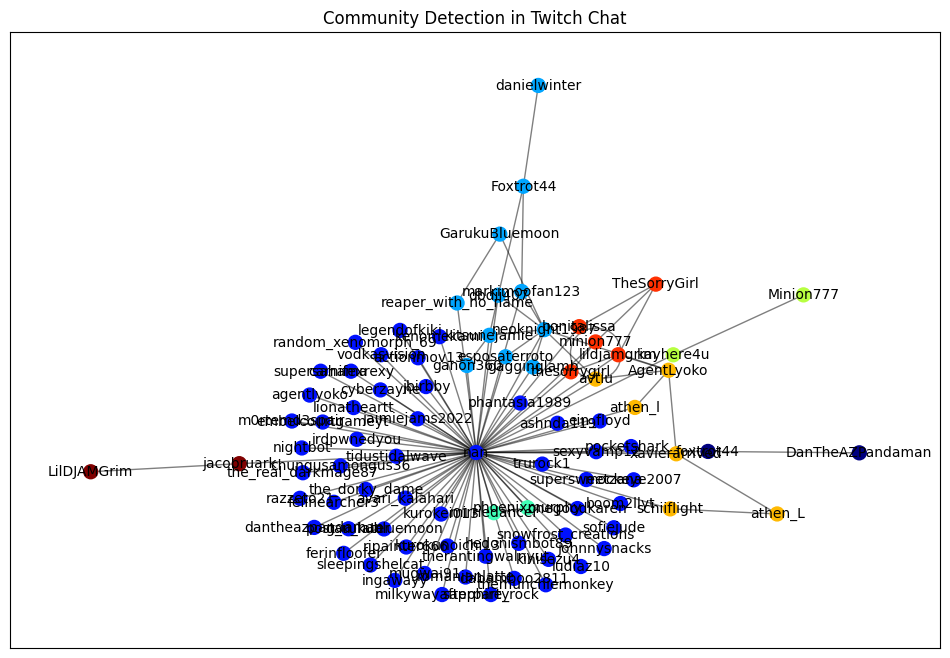

In [ ]:
#Step4: Visualize the communities
import matplotlib.pyplot as plt

# Assign colors to each community
colors = [partition[node] for node in G_undirected.nodes()]

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_undirected)  # positions for all nodes
nx.draw_networkx_nodes(G_undirected, pos, node_color=colors, cmap=plt.cm.jet, node_size=100)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.5)
nx.draw_networkx_labels(G_undirected, pos, font_size=10)

plt.title("Community Detection in Twitch Chat")
plt.show()

In [ ]:
#For user interaction network

In [ ]:
#Step1:create the user interaction network
!pip install pandas networkx matplotlib
import networkx as nx

# Initialize a directed graph
G = nx.DiGraph()

# Iterate through the DataFrame and add edges
for index, row in df.iterrows():
    G.add_edge(row['user_name'], row['mentioned_user'])

# Display basic information about the graph
# print(nx.info(G))  # This line caused the error
print(f"Name: {G.name}")
print(f"Type: {type(G)}")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Name: 
Type: <class 'networkx.classes.digraph.DiGraph'>
Number of nodes: 30
Number of edges: 31


In [ ]:
#Step2: analyze the user interaction network
#Calculate degree centrality: it measures the number of direct connections a node has
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:\n", degree_centrality)

#Identify influential users: sort users by thier dgree centrality to identify the most influential users in the network
influential_users = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Most Influential Users:\n", influential_users[:10])  # Top 10 users

Degree Centrality:
 {'foxtrot44': 0.023529411764705882, nan: 0.8941176470588235, 'dantheazpandaman': 0.011764705882352941, 'supersweetzana': 0.011764705882352941, 'markimoofan123': 0.03529411764705882, 'xavierarrived': 0.03529411764705882, 'DanTheAZPandaman': 0.011764705882352941, 'lionatheartt': 0.011764705882352941, 'athen_l': 0.023529411764705882, 'agentlyoko': 0.011764705882352941, 'actionmov13': 0.011764705882352941, 'Foxtrot44': 0.03529411764705882, 'vodkasvision': 0.011764705882352941, 'irdpwnedyou': 0.011764705882352941, 'avtiu': 0.058823529411764705, 'ganon360': 0.023529411764705882, 'jbirbby': 0.011764705882352941, 'pocketshark_': 0.011764705882352941, 'mockeye2007': 0.011764705882352941, 'nightbot': 0.011764705882352941, 'dabamboo2811': 0.011764705882352941, 'athen_L': 0.023529411764705882, 'AgentLyoko': 0.058823529411764705, 'thesorrygirl': 0.03529411764705882, 'neoknight1987': 0.11764705882352941, 'sexyvamp12': 0.011764705882352941, 'dbdii407': 0.047058823529411764, 'espos

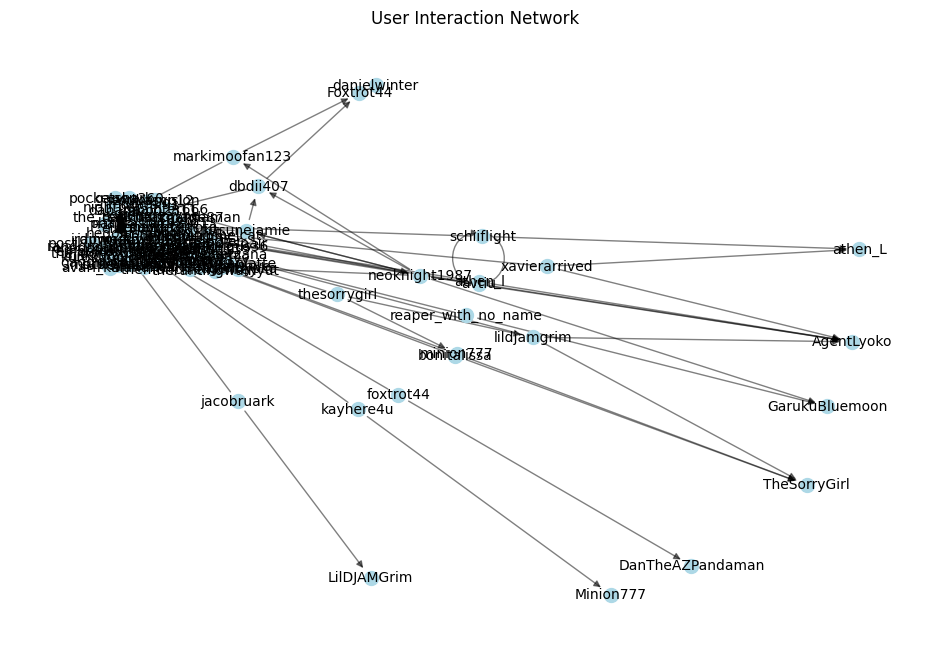

In [ ]:
#Step3: Visualize the user interaction network
import matplotlib.pyplot as plt

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightblue')
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("User Interaction Network")
plt.axis('off')  # Hide the axes
plt.show()

In [ ]:
#It shows that nan (Not a Number) value is the most influential user in my degree centrality. It usually indicates that one or more nodes (users) do not have any incoming or outgoing edges in the graph. To resolve this, I will exclude those Nan users from my analysis.

In [ ]:
#The NaN user actually refers to the streamer (Foxtrot44) because the viewers are reacting and chatting to the streamer

In [ ]:
### user interaction network _Without Nan (interaction only among the viewers)

Filtered Degree Centrality:
                 user  centrality
0          foxtrot44    0.023529
1                NaN    0.894118
2   dantheazpandaman    0.011765
3     supersweetzana    0.011765
4     markimoofan123    0.035294
..               ...         ...
81       LilDJAMGrim    0.011765
82       bonitalissa    0.023529
83         kinisezu4    0.011765
84      legendofkiki    0.011765
85    tidustidalwave    0.011765

[86 rows x 2 columns]
Most Influential Users:
              user  centrality
1             NaN    0.894118
24  neoknight1987    0.117647
28   kitsunejamie    0.058824
22     AgentLyoko    0.058824
14          avtiu    0.058824
26       dbdii407    0.047059
71    lildjamgrim    0.047059
11      Foxtrot44    0.035294
23   thesorrygirl    0.035294
53      minion777    0.035294


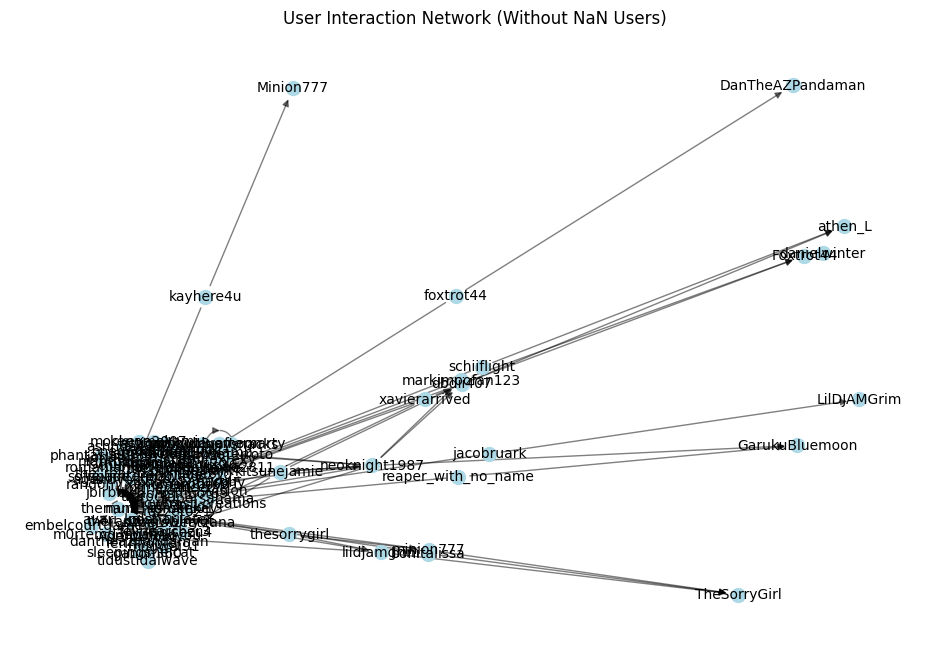

In [ ]:
# Add edges to the graph
for index, row in df.iterrows():
    if row['user_name'] and row['mentioned_user']:  # Ensure both fields are not empty
        G.add_edge(row['user_name'], row['mentioned_user'])

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Convert to a DataFrame for easier manipulation
degree_df = pd.DataFrame(degree_centrality.items(), columns=['user', 'centrality'])

# Exclude users with NaN or zero centrality
degree_df = degree_df[degree_df['centrality'].notna() & (degree_df['centrality'] > 0)]

# Check the filtered DataFrame
print("Filtered Degree Centrality:\n", degree_df)

# Sort users by their degree centrality
influential_users = degree_df.sort_values(by='centrality', ascending=False)

# Display the most influential users
print("Most Influential Users:\n", influential_users.head(10))  # Top 10 users

# Create a new graph with only influential users (those with centrality > 0)
influential_usernames = influential_users['user'].tolist()
G_filtered = G.subgraph(influential_usernames)

# Draw the filtered graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_filtered)  # positions for all nodes
nx.draw_networkx_nodes(G_filtered, pos, node_size=100, node_color='lightblue')
nx.draw_networkx_edges(G_filtered, pos, alpha=0.5)
nx.draw_networkx_labels(G_filtered, pos, font_size=10)

plt.title("User Interaction Network (Without NaN Users)")
plt.axis('off')  # Hide the axes
plt.show()

In [ ]:
### Community detection_without NaN users (interaction only among the viewers)

In [ ]:
# Initialize a directed graph
G = nx.DiGraph()

# Add edges to the graph, ensuring both fields are filled
for index, row in df.iterrows():
    if row['user_name'] and row['mentioned_user']:  # Ensure both fields are not empty
        G.add_edge(row['user_name'], row['mentioned_user'])

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Convert to a DataFrame for easier manipulation
degree_df = pd.DataFrame(degree_centrality.items(), columns=['user', 'centrality'])

# Exclude users with NaN or zero centrality
degree_df = degree_df[degree_df['centrality'].notna() & (degree_df['centrality'] > 0)]

# Create a new graph with only users that have interactions
filtered_users = degree_df['user'].tolist()
G_filtered = G.subgraph(filtered_users)

# Instead of nx.info, use the following to print graph information:
print("Filtered Graph Info:\n")
print(f"Name: {G_filtered.name}")
print(f"Type: {type(G_filtered)}")
print(f"Number of nodes: {G_filtered.number_of_nodes()}")
print(f"Number of edges: {G_filtered.number_of_edges()}")

Filtered Graph Info:

Name: 
Type: <class 'networkx.classes.digraph.DiGraph'>
Number of nodes: 86
Number of edges: 107


In [ ]:
# Apply the Louvain method for community detection
# Convert G_filtered to an undirected graph
G_filtered_undirected = G_filtered.to_undirected()

# Now use the undirected graph for community detection
partition = community_louvain.best_partition(G_filtered_undirected)

# Display the community assignments
print("Community assignments:\n", partition)

Community assignments:
 {'foxtrot44': 0, nan: 1, 'dantheazpandaman': 1, 'supersweetzana': 1, 'markimoofan123': 5, 'xavierarrived': 4, 'DanTheAZPandaman': 0, 'lionatheartt': 1, 'athen_l': 5, 'agentlyoko': 1, 'actionmov13': 1, 'Foxtrot44': 5, 'vodkasvision': 1, 'irdpwnedyou': 1, 'avtiu': 5, 'ganon360': 5, 'jbirbby': 1, 'pocketshark_': 1, 'mockeye2007': 1, 'nightbot': 1, 'dabamboo2811': 1, 'athen_L': 4, 'AgentLyoko': 5, 'thesorrygirl': 6, 'neoknight1987': 5, 'sexyvamp12': 1, 'dbdii407': 5, 'esposaterroto': 5, 'kitsunejamie': 5, 'gagginglamb': 5, 'carnifexrexy': 1, 'sleepingshelcat': 1, 'post_u_later': 1, 'supersahama': 1, 'garukubluemoon': 1, 'jacobruark': 7, 'ein_floyd': 1, 'sapphire_rock': 1, 'hedonismbot89': 1, 'snowfrost_creations': 1, 'mugwai91': 1, 'razzeto21': 1, 'johnnysnacks': 1, 'trurock1': 1, 'embelcourtgameyt': 1, 'romanianlatte': 1, 'cyberzayne': 1, 'm0rtemd3spair': 1, 'ferinfloofer': 1, 'reaper_with_no_name': 5, 'GarukuBluemoon': 5, 'kurokei013': 1, 'rjpainter666': 1, 'minio

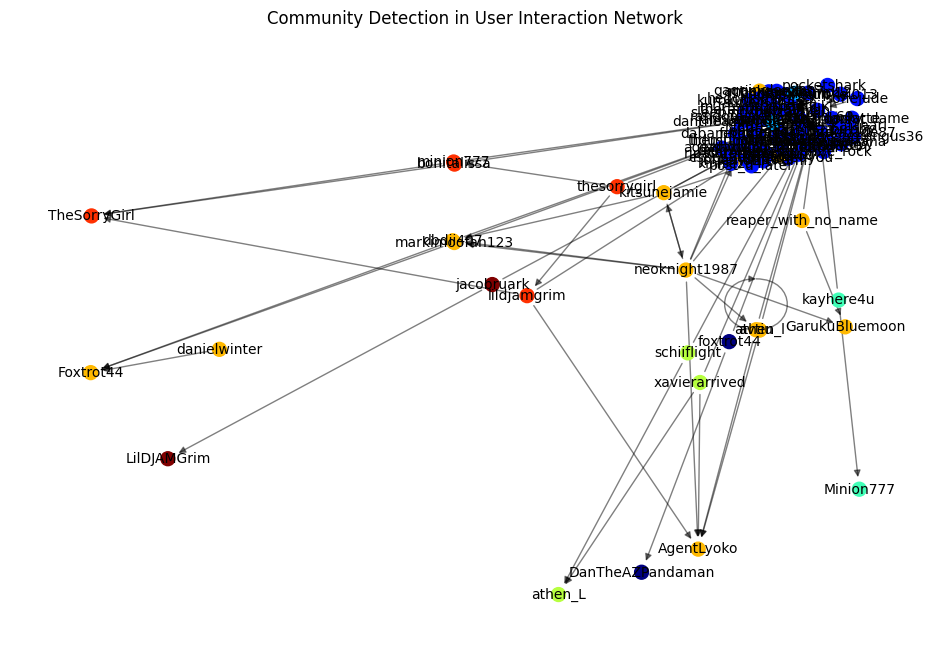

In [ ]:
# Assign colors to each community
colors = [partition[node] for node in G_filtered.nodes()]

# Draw the graph with community colors
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_filtered)  # positions for all nodes
nx.draw_networkx_nodes(G_filtered, pos, node_color=colors, cmap=plt.cm.jet, node_size=100)
nx.draw_networkx_edges(G_filtered, pos, alpha=0.5)
nx.draw_networkx_labels(G_filtered, pos, font_size=10)

plt.title("Community Detection in User Interaction Network")
plt.axis('off')  # Hide the axes
plt.show()

In [ ]:
### message frequency analysis

In [ ]:
#step1: preprocess the data
# Convert timestamp to datetime
# Replace 'Time' with the actual column name in your CSV file
df['timestamp'] = pd.to_datetime(df['Time'])

# Check for missing values and remove them if necessary
df.dropna(subset=['user_name', 'message', 'timestamp'], inplace=True)

# Display the cleaned dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 870 entries, 0 to 870
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            870 non-null    object        
 1   user_name       870 non-null    object        
 2   mentioned_user  39 non-null     object        
 3   message         870 non-null    object        
 4   Unnamed: 4      1 non-null      object        
 5   timestamp       870 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 47.6+ KB
None


<ipython-input-17-d34e5610405d>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['Time'])


In [ ]:
#step2: set time intervals
# Set time intervals (e.g., hourly)
df.set_index('timestamp', inplace=True)
df_resampled = df.resample('H').count()  # Count messages per hour

# Rename the columns for clarity
df_resampled.rename(columns={'message': 'message_count'}, inplace=True)

# Reset index for easier plotting
df_resampled.reset_index(inplace=True)

# Display the resampled data
print(df_resampled.head())

            timestamp  Time  user_name  mentioned_user  message_count  \
0 2025-03-13 00:00:00   248        248               5            248   
1 2025-03-13 01:00:00   176        176              11            176   
2 2025-03-13 02:00:00   201        201               7            201   
3 2025-03-13 03:00:00   245        245              16            245   

   Unnamed: 4  
0           0  
1           0  
2           1  
3           0  


<ipython-input-18-5b802188ebb5>:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample('H').count()  # Count messages per hour


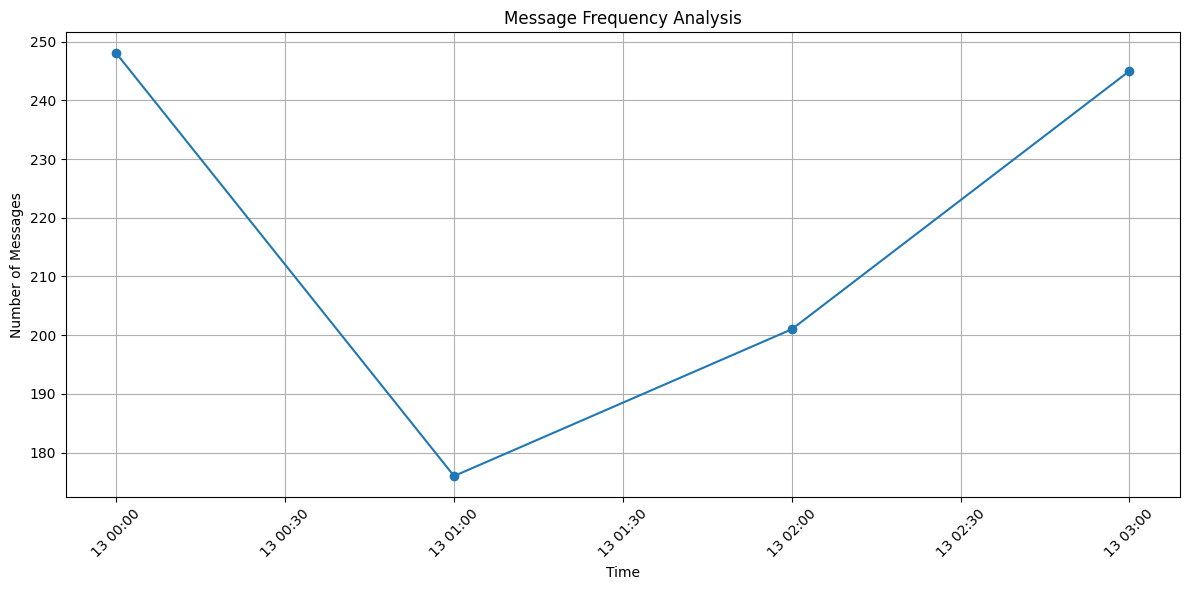

In [ ]:
#step3: visualize message frequency
# Plot the message frequency over time
plt.figure(figsize=(12, 6))
plt.plot(df_resampled['timestamp'], df_resampled['message_count'], marker='o', linestyle='-')
plt.title('Message Frequency Analysis')
plt.xlabel('Time')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

In [ ]:
###Temporal network analysis

In [ ]:
#Step1: preprocess the data
# Convert timestamp to datetime
# Assuming 'Time' is your original timestamp column
# df['timestamp'] = pd.to_datetime(df['Time']) # This line likely causes the error
# Instead, convert Time column to timestamp if it's not already

# Check if 'timestamp' is in columns. If not, assume it's 'Time' and convert:
if 'timestamp' not in df.columns:
    df['timestamp'] = pd.to_datetime(df['Time'])
else:
    # If timestamp column already exists, convert to datetime if needed.
    if not pd.api.types.is_datetime64_any_dtype(df['timestamp']):
        df['timestamp'] = pd.to_datetime(df['timestamp'])

# Check for missing values and remove them if necessary
df.dropna(subset=['user_name', 'mentioned_user', 'timestamp'], inplace=True)

# Display the cleaned dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39 entries, 2025-03-13 00:00:58 to 2025-03-13 03:20:51
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            39 non-null     object        
 1   user_name       39 non-null     object        
 2   mentioned_user  39 non-null     object        
 3   message         39 non-null     object        
 4   Unnamed: 4      0 non-null      object        
 5   timestamp       39 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 2.1+ KB
None


<ipython-input-20-870871c64a7f>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['Time'])


In [ ]:
#Step2: create temporal edges
# Set a time interval (5 minutes in this case)
time_interval = '5T'  # 5 minutes

# Create a new DataFrame to hold temporal edges
temporal_edges = []

# Iterate through the DataFrame and create edges for each time interval
for index, row in df.iterrows():
    start_time = row['timestamp']
    end_time = start_time + pd.Timedelta(minutes=5)  # Define end time for the interval
    temporal_edges.append((row['user_name'], row['mentioned_user'], start_time, end_time))

# Convert to DataFrame
temporal_edges_df = pd.DataFrame(temporal_edges, columns=['source', 'target', 'start_time', 'end_time'])

# Display the temporal edges DataFrame
print(temporal_edges_df.head())

           source            target          start_time            end_time
0       foxtrot44  DanTheAZPandaman 2025-03-13 00:00:58 2025-03-13 00:05:58
1  markimoofan123         Foxtrot44 2025-03-13 00:03:54 2025-03-13 00:08:54
2   xavierarrived           athen_L 2025-03-13 00:21:38 2025-03-13 00:26:38
3   xavierarrived        AgentLyoko 2025-03-13 00:23:39 2025-03-13 00:28:39
4   neoknight1987    markimoofan123 2025-03-13 00:52:50 2025-03-13 00:57:50


In [ ]:
#Step3: create and analyze the temporal network
import networkx as nx

# Initialize a directed graph
G = nx.DiGraph()

# Add temporal edges to the graph
for _, row in temporal_edges_df.iterrows():
    G.add_edge(row['source'], row['target'], start=row['start_time'], end=row['end_time'])

# Instead of nx.info, use the following to print graph information:
print("Temporal Graph Info:\n")
print(f"Name: {G.name}")
print(f"Type: {type(G)}")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Convert to a DataFrame for easier manipulation
degree_df = pd.DataFrame(degree_centrality.items(), columns=['user', 'centrality'])

# Display degree centrality results
print("Degree Centrality:\n", degree_df)

Temporal Graph Info:

Name: 
Type: <class 'networkx.classes.digraph.DiGraph'>
Number of nodes: 30
Number of edges: 31
Degree Centrality:
                    user  centrality
0             foxtrot44    0.034483
1      DanTheAZPandaman    0.034483
2        markimoofan123    0.068966
3             Foxtrot44    0.103448
4         xavierarrived    0.068966
5               athen_L    0.068966
6            AgentLyoko    0.172414
7         neoknight1987    0.310345
8                 avtiu    0.137931
9              dbdii407    0.103448
10        esposaterroto    0.034483
11          gagginglamb    0.034483
12         kitsunejamie    0.137931
13             ganon360    0.034483
14              athen_l    0.034483
15  reaper_with_no_name    0.034483
16       GarukuBluemoon    0.068966
17         danielwinter    0.034483
18         mirriedancer    0.034483
19        phoenixmurphy    0.034483
20            kayhere4u    0.034483
21            Minion777    0.034483
22         thesorrygirl    0.06896

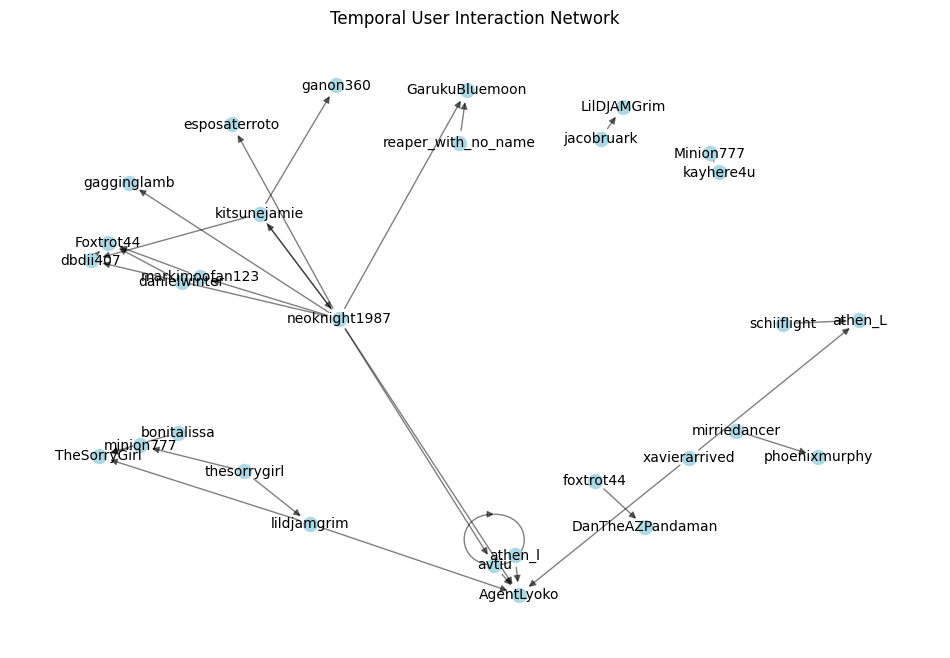

In [ ]:
#Step4: visualize the temporal network
# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightblue')
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Temporal User Interaction Network")
plt.axis('off')  # Hide the axes
plt.show()